In [ ]:
# By Devanshee Tanna, Mohit Vaghela, Prashant Kumar, Sanjay Jain, Shashank Goswami

In [ ]:
#DATASET WAS FETCHED FROM https://arxiv.org/pdf/1809.10717.pdf



In [ ]:

'''A multivariate time series (MTS) is produced when multiple correlated streams
of data are recorded over time. They are commonly found in manufacturing
processes that have several sensors collecting the data in over time. In this
problem, we have a similar multivariate time series data from a pulp-and-paper
industry with a rare event associated with them. It is an unwanted event in the
process a paper break, in our case that should be prevented. The objective of
the problem is to
1. predict the event before it occurs, and
2. identify the variables that are expected to cause the event (in order to be able to prevent it).

We provide a data from a pulp-and-paper mill. An example of a paper manufacturing machine is shown in Figure 1. These machines are typically several
meters long that ingests raw materials at one end and produces reels of paper
as shown in the picture.

Several sensors are placed in different parts of the machine along its length
and breadth. These sensors measure both raw materials (e.g. amount of pulp
fiber, chemicals, etc.) and process variables (e.g. blade type, couch vacuum,
rotor speed, etc.). Paper manufacturing can be viewed as a continuous rolling
process. During this process, sometimes the paper breaks. If a break happens,
the entire process is stopped, the reel is taken out, any found problem is fixed,
and the production is resumed. The resumption can take more than an hour.
The cost of this lost production time is significant for a mill. Even a 5% reduction in the break events will give a significant cost saving for a mill. The
objective of the given problem is to predict such breaks in advance (early prediction) and identify the potential cause(s) to prevent the break. To build such
a prediction model, we will use the data collected from the network of sensors
in a mill. This is a multivariate time series data with break as the response (a
binary variable).
The provided data has,
• 18,398 records.
• Columns:
– time: the timestamp of the row
– y: the binary response variable. There are only 124 rows with y =
1, rest are y = 0.
– x1-x61: predictor variables. All the predictors are continuous variables, except x28 and x61. x61 is a binary variable, and x28 is a
categorical variable. All the predictors are centered. Besides, the
predictors are a mixture of raw materials and process variables. Their
descriptions are omitted for data anonymity.'''

In [1]:
import tensorflow as tf
import keras
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing
from keras.optimizers import SGD

from keras.models import Sequential, Model 
from keras import layers
from keras.layers import Dense, Conv1D, MaxPooling1D, Flatten, Dropout, Input, Embedding
from keras.layers.merge import Concatenate

from keras import backend as K
from keras.callbacks import ModelCheckpoint

import sklearn
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
import seaborn as sns


from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.layers import Embedding
from keras.layers import LSTM

from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D,Conv1D,GlobalAveragePooling1D
from keras import backend as K

from sklearn.linear_model import LogisticRegression


from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report


from keras.models import Sequential, Model 
from keras import layers
from keras.layers import Dense, Conv1D, MaxPooling1D, Flatten, Dropout, Input, Embedding
from keras.layers.merge import Concatenate

Using TensorFlow backend.
/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
import pandas as pd
import os

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [5]:
#Use this below code only when TPU is needed!

try:
  tpu = tf.distribute.cluster_resolver.TPUClusterResolver()  # TPU detection
  print('Running on TPU ', tpu.cluster_spec().as_dict()['worker'])
except ValueError:
  raise BaseException('ERROR: Not connected to a TPU runtime; please see the previous cell in this notebook for instructions!')

tf.config.experimental_connect_to_cluster(tpu)
tf.tpu.experimental.initialize_tpu_system(tpu)
tpu_strategy = tf.distribute.experimental.TPUStrategy(tpu)



resolver = tf.distribute.cluster_resolver.TPUClusterResolver(tpu='grpc://' + os.environ['COLAB_TPU_ADDR'])
tf.config.experimental_connect_to_cluster(resolver)
# This is the TPU initialization code that has to be at the beginning.
tf.tpu.experimental.initialize_tpu_system(resolver)
strategy = tf.distribute.experimental.TPUStrategy(resolver)

Running on TPU  ['10.83.167.98:8470']
INFO:tensorflow:Initializing the TPU system: grpc://10.83.167.98:8470


INFO:tensorflow:Initializing the TPU system: grpc://10.83.167.98:8470


INFO:tensorflow:Clearing out eager caches


INFO:tensorflow:Clearing out eager caches


INFO:tensorflow:Finished initializing TPU system.


INFO:tensorflow:Finished initializing TPU system.


INFO:tensorflow:Found TPU system:


INFO:tensorflow:Found TPU system:


INFO:tensorflow:*** Num TPU Cores: 8


INFO:tensorflow:*** Num TPU Cores: 8


INFO:tensorflow:*** Num TPU Workers: 1


INFO:tensorflow:*** Num TPU Workers: 1


INFO:tensorflow:*** Num TPU Cores Per Worker: 8


INFO:tensorflow:*** Num TPU Cores Per Worker: 8


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:CPU:0, CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:CPU:0, CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:XLA_CPU:0, XLA_CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:XLA_CPU:0, XLA_CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:CPU:0, CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:CPU:0, CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:0, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:0, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:1, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:1, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:2, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:2, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:3, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:3, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:4, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:4, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:5, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:5, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:6, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:6, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:7, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:7, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU_SYSTEM:0, TPU_SYSTEM, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU_SYSTEM:0, TPU_SYSTEM, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:XLA_CPU:0, XLA_CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:XLA_CPU:0, XLA_CPU, 0, 0)


INFO:tensorflow:Initializing the TPU system: grpc://10.83.167.98:8470


INFO:tensorflow:Initializing the TPU system: grpc://10.83.167.98:8470


INFO:tensorflow:Clearing out eager caches


INFO:tensorflow:Clearing out eager caches


INFO:tensorflow:Finished initializing TPU system.


INFO:tensorflow:Finished initializing TPU system.


INFO:tensorflow:Found TPU system:


INFO:tensorflow:Found TPU system:


INFO:tensorflow:*** Num TPU Cores: 8


INFO:tensorflow:*** Num TPU Cores: 8


INFO:tensorflow:*** Num TPU Workers: 1


INFO:tensorflow:*** Num TPU Workers: 1


INFO:tensorflow:*** Num TPU Cores Per Worker: 8


INFO:tensorflow:*** Num TPU Cores Per Worker: 8


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:CPU:0, CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:CPU:0, CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:XLA_CPU:0, XLA_CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:XLA_CPU:0, XLA_CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:CPU:0, CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:CPU:0, CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:0, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:0, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:1, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:1, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:2, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:2, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:3, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:3, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:4, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:4, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:5, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:5, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:6, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:6, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:7, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:7, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU_SYSTEM:0, TPU_SYSTEM, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU_SYSTEM:0, TPU_SYSTEM, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:XLA_CPU:0, XLA_CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:XLA_CPU:0, XLA_CPU, 0, 0)


In [6]:
#Sheet break

sign = lambda x: (1, -1)[x < 0]

def curve_shift(df, shift_by):
    '''
    This function will shift the binary labels in a dataframe.
    The curve shift will be with respect to the 1s. 
    For example, if shift is -2, the following process
    will happen: if row n is labeled as 1, then
    - Make row (n+shift_by):(n+shift_by-1) = 1.
    - Remove row n.
    i.e. the labels will be shifted up to 2 rows up.
    
    Inputs:
    df       A pandas dataframe with a binary labeled column. 
             This labeled column should be named as 'y'.
    shift_by An integer denoting the number of rows to shift.
    
    Output
    df       A dataframe with the binary labels shifted by shift.
    '''
    
    vector = df['SheetBreak'].copy()
    for s in range(abs(shift_by)):
        tmp = vector.shift(sign(shift_by))
        tmp = tmp.fillna(0)
        vector += tmp
    labelcol = 'SheetBreak'
    # Add vector to the df
    df.insert(loc=0, column=labelcol+'tmp', value=vector)
    # Remove the rows with labelcol == 1.
    df = df.drop(df[df[labelcol] == 1].index)
    # Drop labelcol and rename the tmp col as labelcol
    df = df.drop(labelcol, axis=1)
    df = df.rename(columns={labelcol+'tmp': labelcol})
    # Make the labelcol binary
    df.loc[df[labelcol] > 0, labelcol] = 1

    return df


def one_hot(col_name,df1):
  one_hot = pd.get_dummies(df[col_name])
  # Drop column B as it is now encoded
  df1 = df1.drop(col_name,axis = 1)
  # Join the encoded df
  df1 = df1.join(one_hot)
  return df1


def shift(col_name,df1,number):
  df1[col_name] = df1[col_name].shift(number)
  return df1

def split_x_y(df,k):
    y = df[k]
    x = df
    x = x.drop([k], axis = 1)
    
    return x,y


def data_pipeline(df):
    
    
    df = one_hot('Grade&Bwt',df)
    #df = shift('SheetBreak',df,-1)
    df = one_hot('EventPress',df)
    #df.drop(df.tail(1).index,inplace=True)


    x,y = split_x_y(df2,'SheetBreak')
    x.drop(['DateTime'], axis = 1, inplace= True)
    


    X_train, X_test, y_train, y_test = train_test_split(
    x, y, test_size=0.15, random_state= 123) 

    return X_train, X_test, y_train, y_test 



def classification_model(model_name,x_train,y_train,x_val,y_val):
    model = model_name  
    model.fit(x_train, y_train)
    y_pred = model.predict(x_val)
    
    
    confusion = confusion_matrix(y_val, y_pred)
    print(confusion)
    print(classification_report(y_val, y_pred))
    print("Accuracy is", model.score(x_val,y_val))




In [19]:
df = pd.read_csv('/content/drive/My Drive/processminer-sheet-break-rare-event-dataset (1).csv')

df = curve_shift(df,2)

df2 = pd.read_csv('/content/drive/My Drive/Shifted_Process_Minner.csv')

In [20]:
df['SheetBreak'].value_counts()

0.0    20054
1.0      269
Name: SheetBreak, dtype: int64

In [21]:
df = one_hot('Grade&Bwt',df)
#df = shift('SheetBreak',df,-1)
df = one_hot('EventPress',df)
#df.drop(df.tail(1).index,inplace=True)


#SPLITTING THE DATAFRAME INTO X AND Y
x,y = split_x_y(df,'SheetBreak')
x.drop(['DateTime'], axis = 1, inplace= True)

#SPLITTING INTO TRAIN AND TEST
X_train, X_test, y_train, y_test = train_test_split(
x, y, test_size=0.15, random_state= 123, stratify = y) 


In [22]:
#SHAPE OF TRAIN AND TEST

print(X_train.shape)
print(X_test.shape)

(17274, 68)
(3049, 68)


In [23]:
y_train.value_counts()

0.0    17045
1.0      229
Name: SheetBreak, dtype: int64

In [24]:
y_test.value_counts()

0.0    3009
1.0      40
Name: SheetBreak, dtype: int64

In [25]:
# Standardized the data, as standardized data is very important for neural networks., which leads to faster convergence of the loss function.
scaler = preprocessing.StandardScaler()
X_train = scaler.fit_transform(X_train)
#X_valid = scaler.transform(X_valid)
X_test = scaler.transform(X_test)

In [26]:
X_train.shape

(17274, 68)

In [39]:
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

In [40]:
X_train.shape
y_train.shape

(17274,)

In [41]:
with strategy.scope():  
  model_m = Sequential() 

  model_m.add(Conv1D(10, 3, activation='relu', input_shape=(68,1)))
  model_m.add(Conv1D(10, 5, activation='relu'))
  model_m.add(MaxPooling1D(2))
  model_m.add(Conv1D(16, 5, activation='relu'))

  model_m.add(GlobalAveragePooling1D())
  model_m.add(Dropout(0.5))
  model_m.add(Dense(1, activation='softmax'))
  print(model_m.summary())
  model_m.compile(loss='binary_crossentropy',
                optimizer=SGD(), metrics=['accuracy'])
  model_m.fit(X_train, y_train, epochs=10, batch_size = 32)

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_9 (Conv1D)            (None, 66, 10)            40        
_________________________________________________________________
conv1d_10 (Conv1D)           (None, 62, 10)            510       
_________________________________________________________________
max_pooling1d_4 (MaxPooling1 (None, 31, 10)            0         
_________________________________________________________________
conv1d_11 (Conv1D)           (None, 27, 16)            816       
_________________________________________________________________
global_average_pooling1d_4 ( (None, 16)                0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 16)                0         
_________________________________________________________________
dense_7 (Dense)              (None, 1)                

In [ ]:
#IF MODEL IS ALREADY TRAINED TO ANY EXTENT BEFORE THIS
model.load_weights("/content/DL.h5")

In [27]:
#CHECKPOINTING THE MODEL IS ALSO REALLY IMPORTANT
checkpoint = ModelCheckpoint("/content/DL4.h5", monitor='loss', verbose=1,
    save_best_only=True, mode='auto', period=1)


In [28]:
#Sample model
with strategy.scope():
  model = Sequential()
  model.add(Dense(12, input_dim=68, activation='relu'))
  model.add(Dense(8, activation='relu'))
  model.add(Dense(1, activation='sigmoid'))
  # compile the keras model
  model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
  # fit the keras model on the dataset
  model.fit(X_train, y_train, epochs=500, batch_size=128, callbacks = [checkpoint] , validation_data= [X_test,y_test])


Train on 17274 samples, validate on 3049 samples
Epoch 1/500
17274/17274 [==============================] - 2s 141us/step - loss: 0.3506 - accuracy: 0.9082 - val_loss: 0.1293 - val_accuracy: 0.9869

Epoch 00001: loss improved from inf to 0.35060, saving model to /content/DL4.h5
Epoch 2/500
17274/17274 [==============================] - 2s 119us/step - loss: 0.0908 - accuracy: 0.9867 - val_loss: 0.0694 - val_accuracy: 0.9869

Epoch 00002: loss improved from 0.35060 to 0.09076, saving model to /content/DL4.h5
Epoch 3/500
17274/17274 [==============================] - 2s 119us/step - loss: 0.0698 - accuracy: 0.9867 - val_loss: 0.0638 - val_accuracy: 0.9869

Epoch 00003: loss improved from 0.09076 to 0.06975, saving model to /content/DL4.h5
Epoch 4/500
17274/17274 [==============================] - 2s 120us/step - loss: 0.0660 - accuracy: 0.9867 - val_loss: 0.0619 - val_accuracy: 0.9869

Epoch 00004: loss improved from 0.06975 to 0.06601, saving model to /content/DL4.h5
Epoch 5/500
17274/1

In [29]:
train_predictions_baseline = model.predict(X_train, batch_size= 128)
test_predictions_baseline = model.predict(X_test, batch_size= 128)

In [32]:
def plot_cm(labels, predictions, p=0.5):
  cm = confusion_matrix(labels, predictions > p)
  plt.figure(figsize=(5,5))
  sns.heatmap(cm, annot=True, fmt="d")
  plt.title('Confusion matrix @{:.2f}'.format(p))
  plt.ylabel('Actual label')
  plt.xlabel('Predicted label')

  print('Non Breakdowns correctly identified (True Negatives): ', cm[0][0])
  print('Non Breakdowns Detected as Breakdowns  (False Positives): ', cm[0][1])
  print('Machine Breakdowns Missed (False Negatives): ', cm[1][0])
  print('Machine Breakdowns Detected (True Positives): ', cm[1][1])
  print('Total Sheet Breaks: ', np.sum(cm[1]))

loss :  0.14640743244853557

accuracy :  0.9852410554885864

Non Breakdowns correctly identified (True Negatives):  2994
Non Breakdowns Detected as Breakdowns  (False Positives):  15
Machine Breakdowns Missed (False Negatives):  30
Machine Breakdowns Detected (True Positives):  10
Total Sheet Breaks:  40


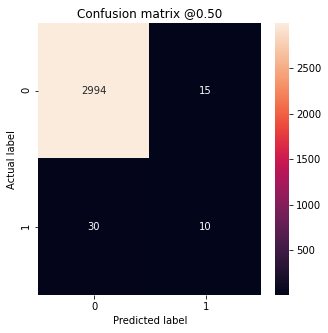

In [33]:
baseline_results = model.evaluate(X_test, y_test,
                                  batch_size= 128, verbose=0)
for name, value in zip(model.metrics_names, baseline_results):
  print(name, ': ', value)
  print()

plot_cm(y_test, test_predictions_baseline) 

In [34]:
#With a recall of 0.25, we are able to capture 0.25% of the Actual Breakdowns , and thus prevent a downtime during those times , thus enabling the company to make more money.